In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train_set.csv')

In [3]:
train.head()

,label,text
0,85389000,pdscpm gb part of panel of chiller
1,85389000,nm p economical extended rot hand parts for c...
2,85389000,lv ma pd trip unit for cvs parts of circuit br...
3,85389000,lv na p trip unit for cvs switch parts of circ...
4,85389000,lv tmd pd trip unit for cvs parts of circuitbr...


In [33]:
train.text.dtype

dtype('O')

In [63]:
train.shape

(23615, 2)

#### Checking missing values:

In [6]:
train.isnull().sum()

label    0
text     0
dtype: int64

#### Checking class label unique values:

In [12]:
train['label'].unique()

array([85389000, 85177090, 85369090, 39269099, 73181500, 85366990,
       85364900, 85238090, 87089900, 33041000, 87082900, 84713010],
      dtype=int64)

#### Just checking a few sentences in 'text' feature and coprresponding 'label' for the same: 

In [31]:
train.text[19], train.label[19]

('re pr release pr electronic group parts for circuit breaker', 85389000)

In [30]:
train.text[9856], train.label[9856]

('stopper plastic part mg stpr  way swp f hous components for wiring harness for captive consumption',
 39269099)

In [29]:
train.text[11326], train.label[11326]

(' flanged h screw m  sa actual user', 73181500)

#### Performing basic text preprocessing:

In [4]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
# Initializing PorterStemmer
ps = PorterStemmer()
# Creating an empty list:
corpus = []
for i in range(0,len(train['text'])):
    review = re.sub('[^a-zA-Z]',' ',train['text'][i])
    review = review.lower()
    review = review.split()
    # Stemming text and removing stopwords:
    review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [5]:
corpus[3]

'lv na p trip unit cv switch part circuit breaker'

In [6]:
train.text[3]

'lv na p trip unit for cvs switch parts of circuit breaker'

#### Using TF-IDF for the vectorization of text data:

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=6003,ngram_range=(1,3))
X = tfidf.fit_transform(corpus).toarray()

In [6]:
X.shape

(23615, 6003)

In [7]:
y = train['label']

In [58]:
y.shape

(23615,)

#### Checking for imbalanced dataset:

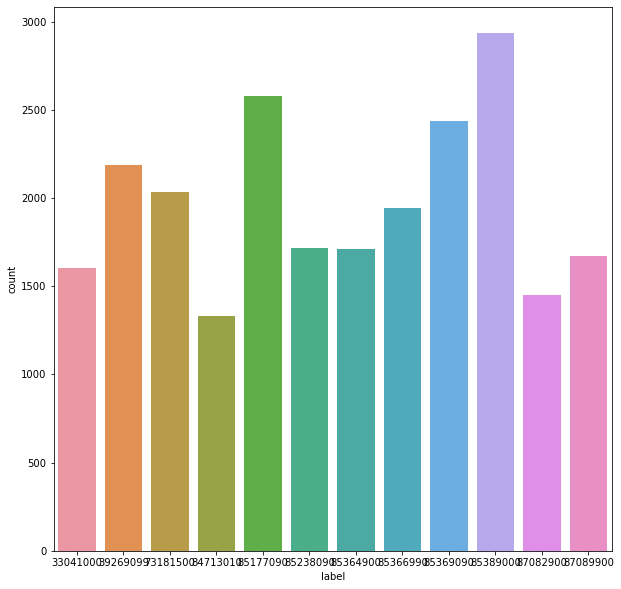

In [39]:
plt.figure(figsize=(10,10))
sns.countplot(y)
plt.show()

#### Over sampling:

In [8]:
from imblearn.over_sampling import RandomOverSampler
sample = RandomOverSampler()
X_oversampled,y_oversampled = sample.fit_sample(X,y)

In [72]:
X_oversampled.shape

(35232, 6003)

In [28]:
type(X_oversampled)

numpy.ndarray

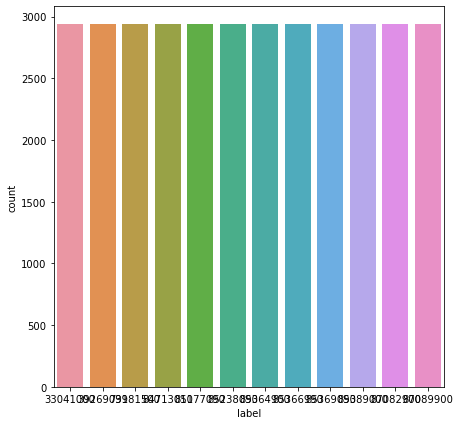

In [17]:
plt.figure(figsize=(7,7))
sns.countplot(y_oversampled)
plt.show()

In [ ]:
##### As we can see by the above graph that the class has been balanced using over sampling.

##### As we can see that the class is imbalanced, therefore we will use over sampling to balance the class.

#### Train test split:

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_oversampled,y_oversampled,test_size=0.3,random_state=26)

In [51]:
tfidf.get_feature_names()[:20]

['aa',
 'aaa',
 'aab',
 'aafgru',
 'aaggqb',
 'aakdichtungbsa',
 'aappdba',
 'aappvca',
 'aastc',
 'aat',
 'aautomobil',
 'ab',
 'abaaacvr',
 'abb',
 'abcd',
 'abdeckung',
 'abl',
 'abolt',
 'absorb',
 'absorbwheel']

#### Creating a function to plot a detailed confusion matrix:

In [74]:
import itertools
def plot_confusion_matrix(cm, classes, name,
                          normalize=False,
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix'+' - '+ name)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### ML model building:

###### MultinomialNB Algorithm:

In [75]:
import time

In [76]:
from sklearn.naive_bayes import MultinomialNB

In [77]:
nb  = MultinomialNB()

In [78]:
start = time.time()
nb.fit(X_train,y_train)
stop = time.time()
print(f'Total time taken to fit the model: {stop-start} seconds')

Total time taken to fit the model: 1.087526559829712 seconds


In [79]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [80]:
y_pred_nb = nb.predict(X_test)
score_nb = accuracy_score(y_test,y_pred_nb)
c_matrix_nb = confusion_matrix(y_test,y_pred_nb)
report_nb = classification_report(y_test,y_pred_nb)

0.896310312204352


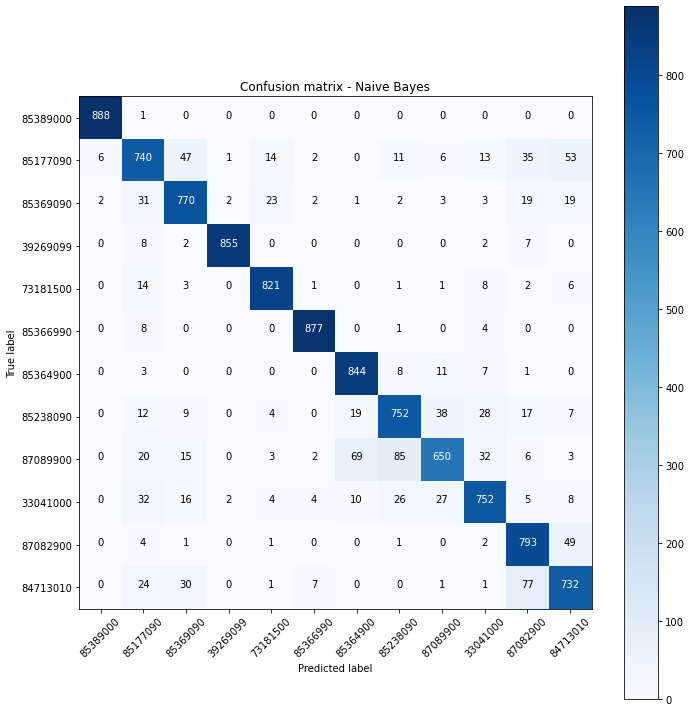

In [81]:
print(score_nb)
plot_confusion_matrix(c_matrix_nb,classes=[85389000, 85177090, 85369090, 39269099, 73181500, 85366990,
       85364900, 85238090, 87089900, 33041000, 87082900, 84713010],name='Naive Bayes')
plt.show()

In [83]:
print(report_nb)

              precision    recall  f1-score   support

    33041000       0.99      1.00      0.99       889
    39269099       0.82      0.80      0.81       928
    73181500       0.86      0.88      0.87       877
    84713010       0.99      0.98      0.99       874
    85177090       0.94      0.96      0.95       857
    85238090       0.98      0.99      0.98       890
    85364900       0.90      0.97      0.93       874
    85366990       0.85      0.85      0.85       886
    85369090       0.88      0.73      0.80       885
    85389000       0.88      0.85      0.87       886
    87082900       0.82      0.93      0.87       851
    87089900       0.83      0.84      0.84       873

    accuracy                           0.90     10570
   macro avg       0.90      0.90      0.90     10570
weighted avg       0.90      0.90      0.90     10570



#### Passive Aggressive Classifier:

In [84]:
from sklearn.linear_model import PassiveAggressiveClassifier
pass_agg_clf = PassiveAggressiveClassifier()
start = time.time()
pass_agg_clf.fit(X_train,y_train)
stop = time.time()
print(f'Total time taken to fit the model: {stop-start} seconds')

Total time taken to fit the model: 70.4968113899231 seconds


In [85]:
y_pred_pass_agg = pass_agg_clf.predict(X_test)
score_pass_agg = accuracy_score(y_test,y_pred_pass_agg)
c_matrix_pass_agg = confusion_matrix(y_test,y_pred_pass_agg)
report_pass_agg = classification_report(y_test,y_pred_pass_agg)

0.9319772942289498


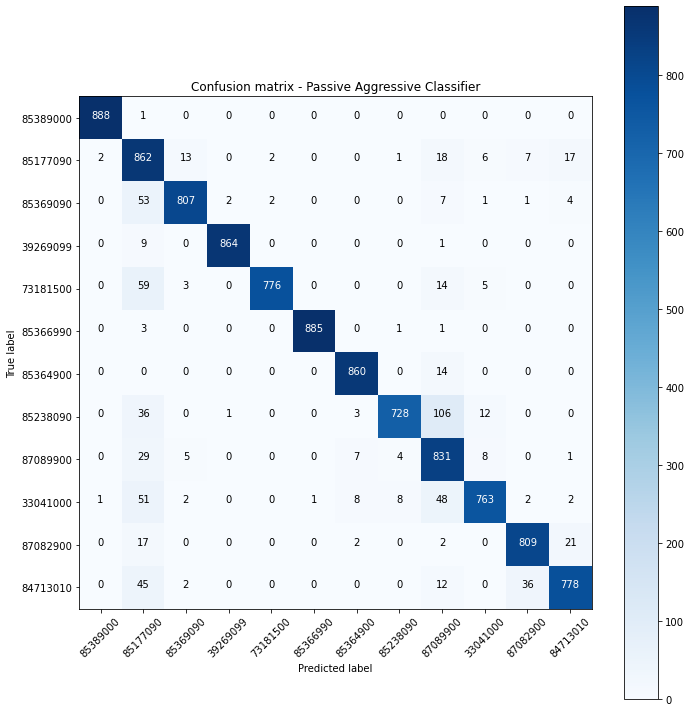

In [86]:
print(score_pass_agg)
plot_confusion_matrix(c_matrix_pass_agg,classes=[85389000, 85177090, 85369090, 39269099, 73181500, 85366990,
       85364900, 85238090, 87089900, 33041000, 87082900, 84713010],name='Passive Aggressive Classifier')
plt.show()

In [87]:
print(report_pass_agg)

              precision    recall  f1-score   support

    33041000       1.00      1.00      1.00       889
    39269099       0.74      0.93      0.82       928
    73181500       0.97      0.92      0.94       877
    84713010       1.00      0.99      0.99       874
    85177090       0.99      0.91      0.95       857
    85238090       1.00      0.99      1.00       890
    85364900       0.98      0.98      0.98       874
    85366990       0.98      0.82      0.89       886
    85369090       0.79      0.94      0.86       885
    85389000       0.96      0.86      0.91       886
    87082900       0.95      0.95      0.95       851
    87089900       0.95      0.89      0.92       873

    accuracy                           0.93     10570
   macro avg       0.94      0.93      0.93     10570
weighted avg       0.94      0.93      0.93     10570



##### Support Vector Machines:

In [9]:
from sklearn.svm import SVC

In [14]:
svc = SVC()
start = time.time()
svc.fit(X_train,y_train)
stop = time.time()
print(f'Total time taken to fit the model: {stop-start} seconds')

Total time taken to fit the model: 2514.517601966858 seconds


In [24]:
y_pred_svc = svc.predict(X_test)
score_svc = accuracy_score(y_test,y_pred_svc)
c_matrix_svc = confusion_matrix(y_test,y_pred_svc)
report_svc = classification_report(y_test,y_pred_svc)

0.9653736991485335


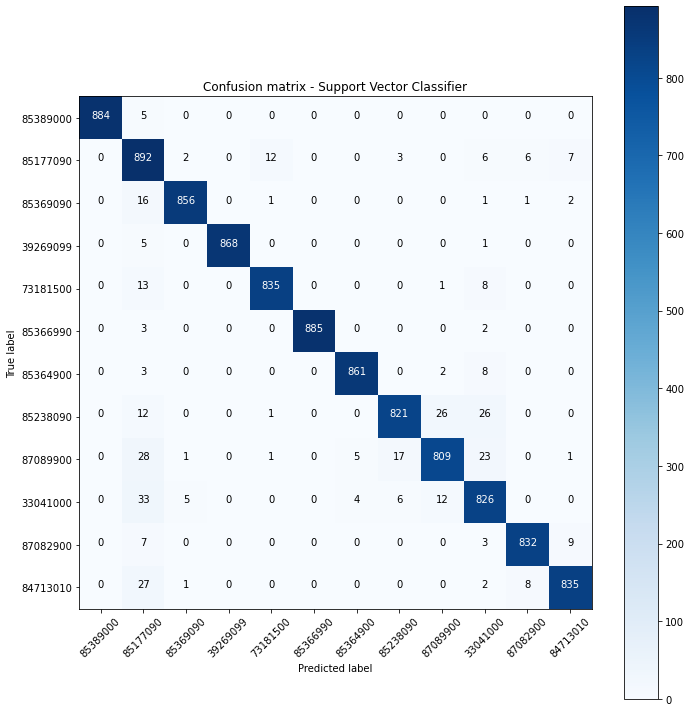

In [25]:
print(score_svc)
plot_confusion_matrix(c_matrix_svc,classes=[85389000, 85177090, 85369090, 39269099, 73181500, 85366990,
       85364900, 85238090, 87089900, 33041000, 87082900, 84713010],name='Support Vector Classifier')
plt.show()

In [107]:
print(report_svc)

              precision    recall  f1-score   support

    33041000       1.00      1.00      1.00       889
    39269099       0.84      0.95      0.89       928
    73181500       0.99      0.97      0.98       877
    84713010       1.00      0.99      1.00       874
    85177090       0.98      0.97      0.98       857
    85238090       1.00      0.99      0.99       890
    85364900       0.99      0.99      0.99       874
    85366990       0.97      0.94      0.95       886
    85369090       0.96      0.91      0.93       885
    85389000       0.92      0.93      0.93       886
    87082900       0.98      0.98      0.98       851
    87089900       0.96      0.95      0.96       873

    accuracy                           0.96     10570
   macro avg       0.97      0.96      0.96     10570
weighted avg       0.97      0.96      0.96     10570



#### Random Forest:

In [88]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
start = time.time()
rf.fit(X_train,y_train)
stop = time.time()
print(f'Total time taken to fit the model: {stop-start} seconds')

Total time taken to fit the model: 107.86021065711975 seconds


In [89]:
y_pred_rf = rf.predict(X_test)
score_rf = accuracy_score(y_test,y_pred_rf)
c_matrix_rf = confusion_matrix(y_test,y_pred_rf)
report_rf = classification_report(y_test,y_pred_rf)

0.9553453169347209


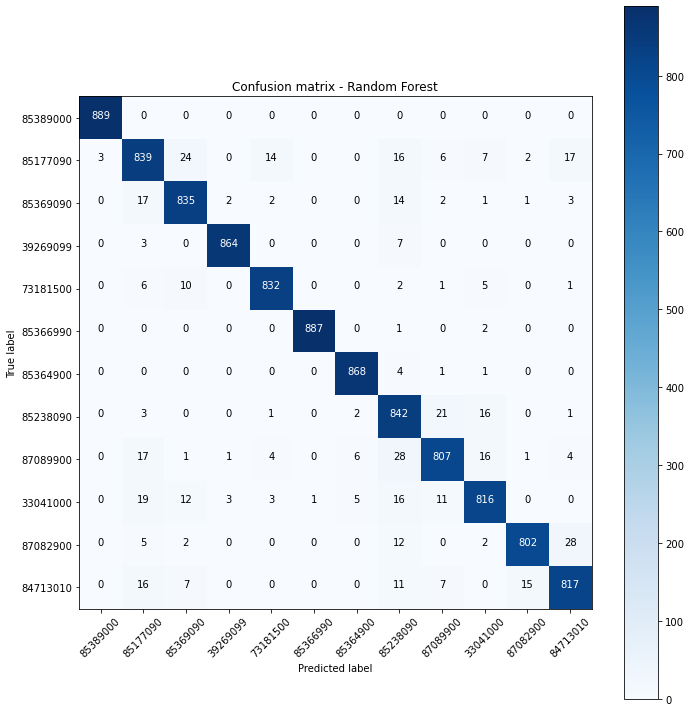

In [91]:
print(score_rf)
plot_confusion_matrix(c_matrix_rf,classes=[85389000, 85177090, 85369090, 39269099, 73181500, 85366990,
       85364900, 85238090, 87089900, 33041000, 87082900, 84713010],name='Random Forest')
plt.show()

In [92]:
print(report_rf)

              precision    recall  f1-score   support

    33041000       1.00      1.00      1.00       889
    39269099       0.91      0.90      0.91       928
    73181500       0.94      0.95      0.94       877
    84713010       0.99      0.99      0.99       874
    85177090       0.97      0.97      0.97       857
    85238090       1.00      1.00      1.00       890
    85364900       0.99      0.99      0.99       874
    85366990       0.88      0.95      0.92       886
    85369090       0.94      0.91      0.93       885
    85389000       0.94      0.92      0.93       886
    87082900       0.98      0.94      0.96       851
    87089900       0.94      0.94      0.94       873

    accuracy                           0.96     10570
   macro avg       0.96      0.96      0.96     10570
weighted avg       0.96      0.96      0.96     10570



##### As we can see that SVC has taken a very long time to fit the model and given us similar performace as Passive aggressive classifier. So, we will not be working with SVC for this dataset. Random Forest also takes time. However, it is known that multinomial NB and Passive aggressive classifier work better with text data and are much faster than ensemble techniques or even SVC. Therefore, we just go ahead and check the accuracy for both of these algorithms using K-fold cross validation.

#### Checking with K-fold cross validation and cross val score for the algorithms - Passive aggressive classifier andMultinomial NB as these gave the best results in the least amount of training time and work very well with text data.

In [100]:
from sklearn.model_selection import KFold, StratifiedKFold

def cross_val(X, y, model, params, folds=10):

    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=11)
    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        print(f"Fold: {fold}")
        x_train, y_train = X[train_idx], y.iloc[train_idx]
        x_test, y_test = X[test_idx], y.iloc[test_idx]

        alg = model(**params)
        alg.fit(x_train, y_train)
        
        pred = alg.predict(x_test)
        score = accuracy_score(y_test, pred)
        print(f"accuracy score: {score}")
        print("_____"*10)
    
    return alg

In [95]:
pass_agg_params = {
             'fit_intercept': True, 
             'max_iter': 1000,
             'tol': 1e-3, 
             'early_stopping': False, 
             'validation_fraction': 0.1, 
             'n_iter_no_change': 5, 
             'shuffle': True,
             'loss': 'hinge',
             'n_jobs': -1}

In [101]:
pass_agg_cross_val = cross_val(X_oversampled, y_oversampled, PassiveAggressiveClassifier, pass_agg_params)

Fold: 0
accuracy score: 0.9477866061293984
__________________________________________________
Fold: 1
accuracy score: 0.9511918274687855
__________________________________________________
Fold: 2
accuracy score: 0.9437978995174567
__________________________________________________
Fold: 3
accuracy score: 0.9491910303718422
__________________________________________________
Fold: 4
accuracy score: 0.944933295486801
__________________________________________________
Fold: 5
accuracy score: 0.9469202384331535
__________________________________________________
Fold: 6
accuracy score: 0.948339483394834
__________________________________________________
Fold: 7
accuracy score: 0.9443655975021289
__________________________________________________
Fold: 8
accuracy score: 0.9497587283565143
__________________________________________________
Fold: 9
accuracy score: 0.948339483394834
__________________________________________________


#### Checking with Multinomial NB:

In [102]:
nb_params = {
             'alpha': True, 
             'fit_prior': 1000,
             'class_prior': None
             }

In [103]:
multinomial_nb_cross_val = cross_val(X_oversampled, y_oversampled, MultinomialNB, nb_params)

Fold: 0
accuracy score: 0.89472190692395
__________________________________________________
Fold: 1
accuracy score: 0.8969920544835415
__________________________________________________
Fold: 2
accuracy score: 0.8989497587283565
__________________________________________________
Fold: 3
accuracy score: 0.8989497587283565
__________________________________________________
Fold: 4
accuracy score: 0.9020720976440534
__________________________________________________
Fold: 5
accuracy score: 0.9029236446210616
__________________________________________________
Fold: 6
accuracy score: 0.9006528526823729
__________________________________________________
Fold: 7
accuracy score: 0.8932727788816349
__________________________________________________
Fold: 8
accuracy score: 0.8924212319046267
__________________________________________________
Fold: 9
accuracy score: 0.9003690036900369
__________________________________________________


##### Therefore, as we can see that Passive aggressive classifier performs well even with K-fold cross validation. Therefore, we will use this model for out test dataset.

In [12]:
pass_agg_clf = PassiveAggressiveClassifier(fit_intercept= True, 
             max_iter= 1000,
             tol=1e-3, 
             early_stopping=False, 
             validation_fraction = 0.1, 
             n_iter_no_change = 5, 
             shuffle = True,
             loss = 'hinge',
             n_jobs = -1)

pass_agg_clf.fit(X_train,y_train)

PassiveAggressiveClassifier(n_jobs=-1)

In [13]:
import pickle
filename = 'pass_agg_clf.sav'
pickle.dump(pass_agg_clf, open(filename, 'wb'))

In [14]:
clf = pickle.load(open(filename, 'rb'))

#### Now, let's work with the test file:

In [15]:
test = pd.read_csv('test_set.csv')

In [16]:
test.head()

,text
0,lv tmd pd trip unit for nh parts of circuit br...
1,module tm analog outputs analog output expansi...
2,command group t iii mechanismt p parts forcir...
3,parts of relayelectrical contact issu e f xxup
4,parts for programmable logic controllers dm ...


In [110]:
test.text.dtype

dtype('O')

In [111]:
test.shape

(5894, 1)

#### Checking missing values:

In [7]:
test.isnull().sum()

text    0
dtype: int64

#### Performing basic text preprocessing:

In [17]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
# Initializing PorterStemmer
ps = PorterStemmer()
# Creating an empty list:
corpus = []
for i in range(0,len(test['text'])):
    review = re.sub('[^a-zA-Z]',' ',test['text'][i])
    review = review.lower()
    review = review.split()
    # Stemming text and removing stopwords:
    review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [113]:
corpus[3]

'part relayelectr contact issu e f xxup'

In [114]:
train.text[3]

'lv na p trip unit for cvs switch parts of circuit breaker'

#### Using TF-IDF for the vectorization of text data:

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
test_array = tfidf.fit_transform(corpus).toarray()

In [116]:
test_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
test_array.shape

(5894, 6003)

#### Prediction on test data and prediction file:

In [20]:
y_pred_test = clf.predict(test_array)

In [21]:
y_pred_test = pd.DataFrame(y_pred_test)

In [22]:
y_pred_test

,0
0,85389000
1,85389000
2,85389000
3,85389000
4,85369090
...,...
5889,85389000
5890,39269099
5891,84713010
5892,84713010


In [35]:
y_pred_test.rename(columns={0:'label'},inplace=True)

In [36]:
y_pred_test

,label
0,85389000
1,85389000
2,85389000
3,85389000
4,85369090
...,...
5889,85389000
5890,39269099
5891,84713010
5892,84713010


In [37]:
submission = pd.concat([y_pred_test['label'],test['text']],axis=1)

In [38]:
submission

,label,text
0,85389000,lv tmd pd trip unit for nh parts of circuit br...
1,85389000,module tm analog outputs analog output expansi...
2,85389000,command group t iii mechanismt p parts forcir...
3,85389000,parts of relayelectrical contact issu e f xxup
4,85369090,parts for programmable logic controllers dm ...
...,...,...
5889,85389000,gdf latitude portable computernotebookassyba...
5890,39269099,cfjx precision portable computernotebook ass...
5891,84713010,eguujnnincnnnuas xuup acj note book computer l...
5892,84713010,egubjnninnnnums wwup note book computer laptop...


In [39]:
submission.to_csv('predictions.csv',index=False)